<a href="https://colab.research.google.com/github/minkyeongk/DL_TensorFlow_Developer/blob/main/2.%20Convolutional%20Neural%20Networks%20in%20TensorFlow/week_2/week_2_notebook_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  
import os
import zipfile 

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')   # 이 경로에 extractall 한다  
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
# os.path.join 사용 안해도 되지 않나?

import tensorflow as tf 

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Image augmentation with ImageDataGenerator
# 생성기의 인자와 flow 함수 인자 헷갈리지 말기 
train_gene = ImageDataGenerator(
            rescale = 1/255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True, 
            fill_mode='nearest'
            )

val_gene = ImageDataGenerator(rescale=1/255)

train_generator = train_gene.flow_from_directory(
    '/tmp/horse-or-human/',
    batch_size=128,
    target_size=(300,300),
    class_mode='binary',
)

val_generator = val_gene.flow_from_directory(
    '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=8,
    epochs=100,
    verbose=1,
    validation_data = val_generator,
    validation_steps=8
    )



--2021-01-11 18:42:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.7.176, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   151MB/s    in 0.9s    

2021-01-11 18:42:41 (151 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-01-11 18:42:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.253.62.128, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114801

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
8/8 [==============================] - 27s 2s/step - loss: 0.6979 - accuracy: 0.4975 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 21s 3s/step - loss: 0.6848 - accuracy: 0.5069 - val_loss: 0.6732 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 21s 3s/step - loss: 0.6699 - accuracy: 0.5884 - val_loss: 0.6558 - val_accuracy: 0.5000
Epoch 4/100
8/8 [==============================] - 21s 3s/step - loss: 0.6558 - accuracy: 0.6611 - val_loss: 0.6283 - val_accuracy: 0.6953
Epoch 5/100
8/8 [==============================] - 23s 3s/step - loss: 0.6138 - accuracy: 0.6961 - val_loss: 0.5992 - val_accuracy: 0.6328
Epoch 6/100
8/8 [==============================] - 21s 3s/step - loss: 0.6037 - accuracy: 0.6781 - val_loss: 0.6373 - val_accuracy: 0.5195
Epoch 7/100
8/8 [==============================] - 21s 3s/step - loss: 0.5324 - accuracy: 0.7602 - val_loss: 0.5689 - val_accuracy: 0.6328
Epoch 8/100
8/8 [==========

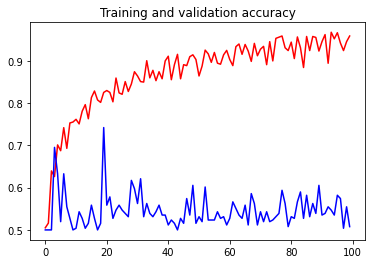

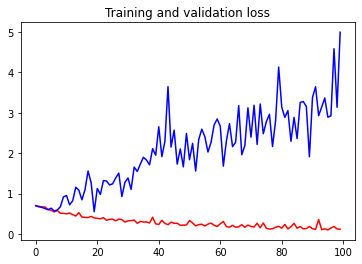

In [2]:
import matplotlib.pyplot as plt 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plr.plot(가로축, 세로축 값, 색, 라벨)
plt.plot(epochs, acc, 'r', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')

# 그래프의 형태인 듯 
plt.figure()

plt.plot(epochs, loss, 'r', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation accuracy')
plt.title('Training and validation loss')

# 좌측 상단에 각 그래프 값 라벨 출력 
plt.show()

# val_acc가 acc와 비슷한 양상을 보이며 상승하고 있지 않음 
# val set이 다양하지 않아 augmentation의 효과를 확인하기 힘든 경우이거나 overfit이 해결되지 못한 경우라고 볼 수 있음  
# augmentation이 이루어졌기 때문에 전자에 가까울 것으로 추측됨 